In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/home/a67b6b32-f797-4735-ba07-1fbb1bf9483f/AI-ML/Linear-Regression/Exercise-1/data/advertising.csv", header=0)
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


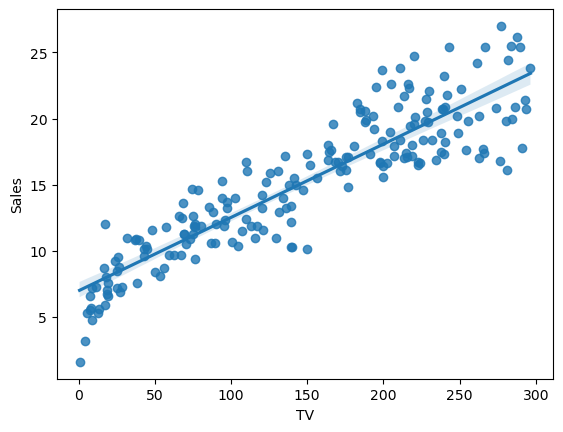

In [13]:
sns.regplot(x="TV", y="Sales", data=df)
plt.show()

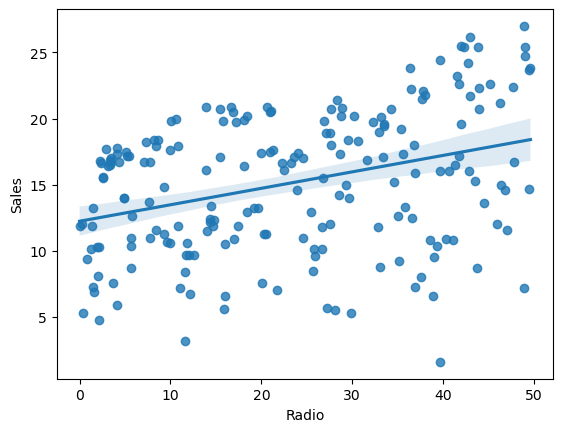

In [15]:
sns.regplot(x="Radio", y="Sales", data=df)
plt.show()

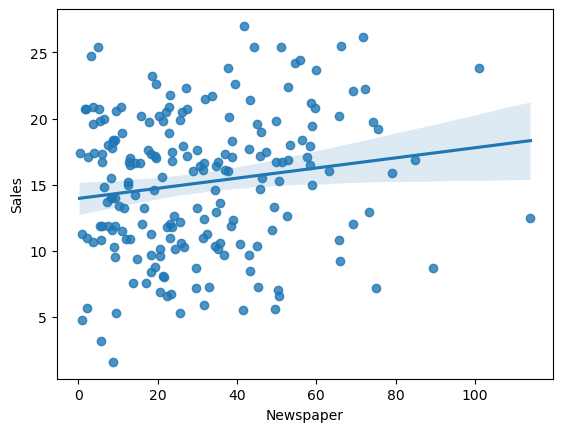

In [16]:
sns.regplot(x="Newspaper", y="Sales", data=df)
plt.show()

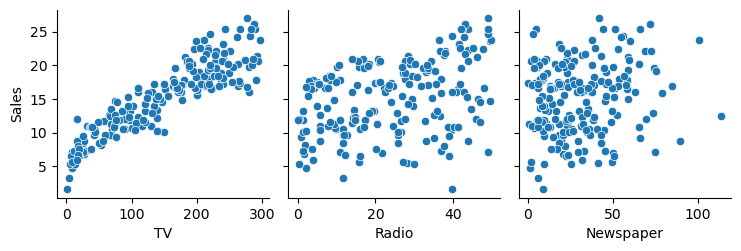

In [19]:
#visualizing all graph side by side
sns.pairplot(x_vars=["TV","Radio", "Newspaper"], y_vars="Sales", data=df)
plt.show()

<Axes: >

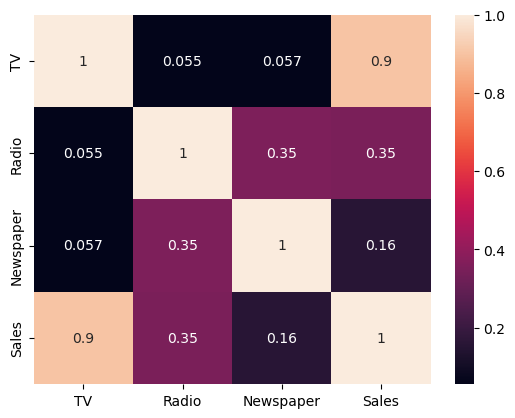

In [21]:
#Lets Create Heatmap
sns.heatmap(df.corr(), annot=True)

##Steps:</br>
1- Create X and Y</br>
2- Create Training Data</br>
3- Create Test Data</br>
4- Train Model</br>
5- Evaluate model

In [24]:
#Create X
X = df.TV

#Create y
y = df.Sales

In [26]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [28]:
X_train.shape

(140,)

In [30]:
#First we will use Stats Model Library to Train Our Model
#Stats Model library by default not having Intercept Constant c (y = c + mx)
#It means Stats ModelLibrary assume your fitted line pass from origin 0,0
#To make it realistic fitted line we will add Intercept Constant

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
#OLS Stands for Ordinary Least Square - this is the approach Stats Model use to minimize the error.
lr_model = lr.fit()

In [32]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        18:11:00   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Residual Analysis

In [35]:
#Residual means Error between Actual Target Value and Predicted Target Value
y_train_predicted = lr_model.predict(X_train_sm)
res = y_train - y_train_predicted

/tmp/ipykernel_96/67146723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


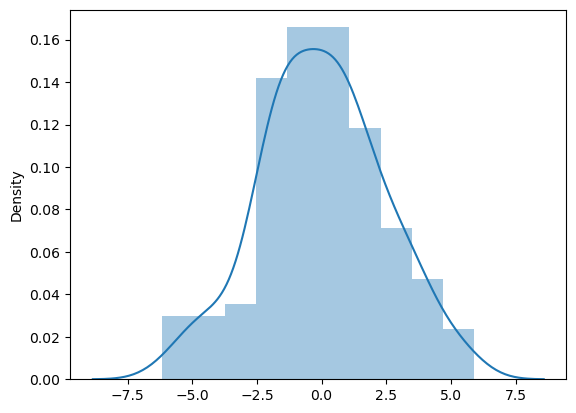

In [39]:
#one of the Linear Regression Condition is Error Term Should be normally distributed.
sns.distplot(res)
plt.show()

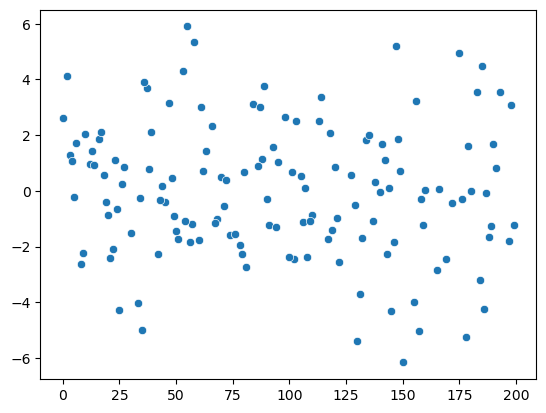

In [41]:
##Second Condition of Linear Regressionis Error term should not be dependent on each other. it should not have any easily visible pattern
sns.scatterplot(res)
plt.show()